In [1]:
from tensorflow.python.client import device_lib

In [2]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14514673314992676193
]


# 1. Criando o Modelo

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, InputLayer

In [4]:
model = Sequential();
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(32,32,3), padding='same'));
model.add(MaxPooling2D(pool_size = (2,2)));
model.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'));
model.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'));
model.add(MaxPooling2D(pool_size = (2,2)));
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'));
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'));
model.add(MaxPooling2D(pool_size = (2,2)));
model.add(Flatten());
model.add(Dense(10, activation='softmax'));

2021-07-18 11:34:05.850207: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-18 11:34:05.850732: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2021-07-18 11:34:05.850857: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-18 11:34:05.851267: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-18 11:34:05.851606: I tensorflow/core/common

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          9

# 2. Carregando Base de Dados

## 2.1. CIFAR-10

In [6]:
import numpy as np
from keras.datasets import cifar10

In [7]:
(CF_X_train, CF_y_train), (CF_X_test, CF_y_test) = cifar10.load_data()
(CF_X_train.shape, CF_y_train.shape), (CF_X_test.shape, CF_y_test.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

## 2.2. SVHN

In [8]:
from scipy.io import loadmat
mat_test = loadmat('test_32x32.mat')
mat_train = loadmat('train_32x32.mat')

SV_X_train = mat_train['X']
SV_y_train = mat_train['y']
SV_X_test = mat_test['X']
SV_y_test = mat_test['y']

(SV_X_train.shape, SV_y_train.shape), (SV_X_test.shape, SV_y_test.shape)

(((32, 32, 3, 73257), (73257, 1)), ((32, 32, 3, 26032), (26032, 1)))

### 2.2.1. Mudar Ordem dos eixos na SVHN

In [9]:
SV_X_test = np.moveaxis(SV_X_test, 3, 0)
SV_X_train = np.moveaxis(SV_X_train, 3, 0)
(SV_X_train.shape, SV_y_train.shape), (SV_X_test.shape, SV_y_test.shape)

(((73257, 32, 32, 3), (73257, 1)), ((26032, 32, 32, 3), (26032, 1)))

### 2.2.2. Iniciar classes a partir do 0

In [10]:
np.unique(SV_y_train), np.unique(SV_y_test)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8))

In [11]:
SV_y_test[SV_y_test==10]=0
SV_y_train[SV_y_train==10]=0
np.unique(SV_y_train), np.unique(SV_y_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

### 2.3. Transformar Y_test e y_train em vertores

### 2.3.1. CIFAR-10

In [12]:
CF_y_train = CF_y_train.squeeze()
CF_y_test = CF_y_test.squeeze()
(CF_X_train.shape, CF_y_train.shape), (CF_X_test.shape, CF_y_test.shape)

(((50000, 32, 32, 3), (50000,)), ((10000, 32, 32, 3), (10000,)))

### 2.3.2. SVHN

In [13]:
SV_y_train = SV_y_train.squeeze()
SV_y_test = SV_y_test.squeeze()
(SV_X_train.shape, SV_y_train.shape), (SV_X_test.shape, SV_y_test.shape)

(((73257, 32, 32, 3), (73257,)), ((26032, 32, 32, 3), (26032,)))

## 2.4.  Converter para Float32 e Transformar imagens para ficar entre 0 e 1

### 2.4.1. CIFAR-10

In [14]:
CF_X_train = CF_X_train.astype(np.float32)
CF_X_test = CF_X_test.astype(np.float32)
CF_X_train.dtype, CF_X_test.dtype

(dtype('float32'), dtype('float32'))

In [15]:
(CF_X_train.min(), CF_X_train.max()), (CF_X_test.min(), CF_X_test.max())

((0.0, 255.0), (0.0, 255.0))

In [16]:
CF_X_train /= 255
CF_X_test /= 255
(CF_X_train.min(), CF_X_train.max()), (CF_X_test.min(), CF_X_test.max())

((0.0, 1.0), (0.0, 1.0))

### 2.4.2. SVHN

In [17]:
SV_X_train = SV_X_train.astype(np.float32)
SV_X_test = SV_X_test.astype(np.float32)
SV_X_train.dtype, SV_X_test.dtype

(dtype('float32'), dtype('float32'))

In [18]:
(SV_X_train.min(), SV_X_train.max()), (SV_X_test.min(), SV_X_test.max())

((0.0, 255.0), (0.0, 255.0))

In [19]:
SV_X_train /= 255
SV_X_test /= 255

In [20]:
(SV_X_train.min(), SV_X_train.max()), (SV_X_test.min(), SV_X_test.max())

((0.0, 1.0), (0.0, 1.0))

## 2.5.  Tamanho e Quantidade das imagens

### 2.5.1. CIFAR-10

In [21]:
(CF_X_train.shape, CF_y_train.shape), (CF_X_test.shape, CF_y_test.shape)

(((50000, 32, 32, 3), (50000,)), ((10000, 32, 32, 3), (10000,)))

### 2.5.2. SVHN

In [22]:
(SV_X_train.shape, SV_y_train.shape), (SV_X_test.shape, SV_y_test.shape)

(((73257, 32, 32, 3), (73257,)), ((26032, 32, 32, 3), (26032,)))

## 2.6. Distribuição das Classes

### 2.6.1. CIFAR-10

In [23]:
(unique_train, counts_train) = np.unique(CF_y_train, return_counts=True)
(unique_test, counts_test) = np.unique(CF_y_test, return_counts=True)

(unique_train, counts_train), (unique_test, counts_test)

((array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000])),
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])))

### 2.6.2. SVHN

In [24]:
(unique_train, counts_train) = np.unique(SV_y_train, return_counts=True)
(unique_test, counts_test) = np.unique(SV_y_test, return_counts=True)

(unique_train, counts_train), (unique_test, counts_test)

((array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([ 4948, 13861, 10585,  8497,  7458,  6882,  5727,  5595,  5045,
          4659])),
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([1744, 5099, 4149, 2882, 2523, 2384, 1977, 2019, 1660, 1595])))

## 2.7. Converter Classes para UINT8

### 2.7.1. CIFAR-10

In [25]:
# Já está em UINT8
CF_y_train.dtype, CF_y_test.dtype

(dtype('uint8'), dtype('uint8'))

### 2.7.2. SVHN

In [26]:
# Já está em UINT8
SV_y_train.dtype, SV_y_test.dtype

(dtype('uint8'), dtype('uint8'))

## 2.8. To Categorical

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
num_classes_CF = len(np.unique(CF_y_train))
num_classes_SV = len(np.unique(SV_y_train))

CF_y_train = to_categorical(CF_y_train, num_classes_CF)
SV_y_train = to_categorical(SV_y_train, num_classes_SV)

# 3. Inserir Ruido nas imagens

## 3.1. CIFAR-10

In [29]:
from skimage.util import random_noise
import matplotlib.pyplot as plt

In [30]:
CF_X_NoNoise = CF_X_train
CF_X_LowNoise = CF_X_train.copy()
CF_X_HighNoise = CF_X_train.copy()

In [31]:
for i in range(CF_X_train.shape[0]):
    CF_X_LowNoise[i] = random_noise(CF_X_LowNoise[i], mode='gaussian', var=0.001)
    CF_X_HighNoise[i] = random_noise(CF_X_HighNoise[i], mode='gaussian', var=0.01)

Text(0.5, 1.0, 'High Noise')

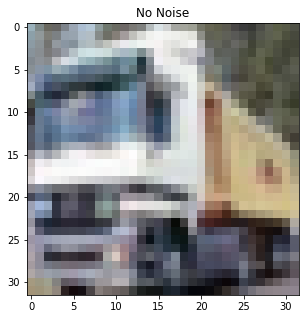

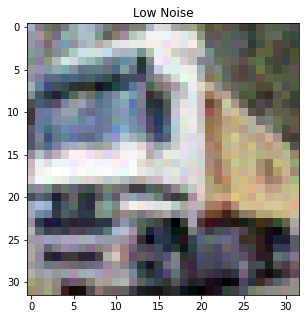

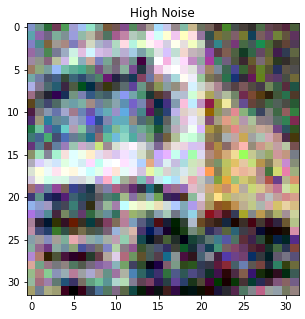

In [32]:
CF_id = 1

plt.rcParams['figure.figsize'] = 5, 5
plt.figure()
plt.imshow(CF_X_NoNoise[CF_id])
plt.title("No Noise")

plt.figure()
plt.imshow(CF_X_LowNoise[CF_id])
plt.title("Low Noise")

plt.figure()
plt.imshow(CF_X_HighNoise[CF_id])
plt.title("High Noise")

## 3.2. SVHN

In [33]:
SV_X_NoNoise = SV_X_train
SV_X_LowNoise = SV_X_train.copy()
SV_X_HighNoise = SV_X_train.copy()

In [34]:
for i in range(SV_X_train.shape[0]):
    SV_X_LowNoise[i] = random_noise(SV_X_LowNoise[i], mode='gaussian', var=0.001)
    SV_X_HighNoise[i] = random_noise(SV_X_HighNoise[i], mode='gaussian', var=0.01)

Text(0.5, 1.0, 'High Noise')

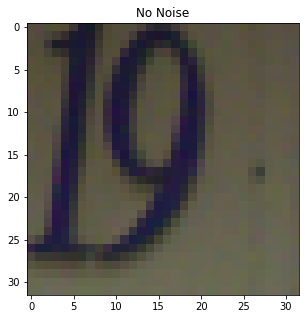

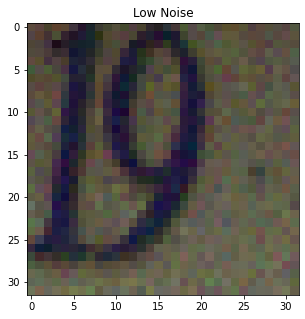

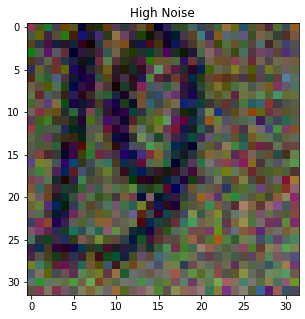

In [35]:
SV_id = 1

plt.rcParams['figure.figsize'] = 5, 5
plt.figure()
plt.imshow(SV_X_NoNoise[CF_id])
plt.title("No Noise")

plt.figure()
plt.imshow(SV_X_LowNoise[CF_id])
plt.title("Low Noise")

plt.figure()
plt.imshow(SV_X_HighNoise[CF_id])
plt.title("High Noise")

# 4. Treinando os modelos

In [36]:
from keras.models import clone_model

In [37]:
model_CF_NoNoise =   clone_model(model)
model_CF_LowNoise =  clone_model(model)
model_CF_HighNoise = clone_model(model)
model_SV_NoNoise =   clone_model(model)
model_SV_LowNoise =  clone_model(model)
model_SV_HighNoise = clone_model(model)

model_CF_NoNoise.compile  (optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_CF_LowNoise.compile (optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_CF_HighNoise.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_SV_NoNoise.compile  (optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_SV_LowNoise.compile (optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_SV_HighNoise.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [38]:
model_CF_NoNoise.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          9

In [39]:
CF_X_NoNoise.shape, CF_y_train.shape

((50000, 32, 32, 3), (50000, 10))

In [40]:
model_CF_NoNoise.fit(CF_X_NoNoise, CF_y_train, epochs=10, verbose=1)

2021-07-18 11:34:55.477435: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-18 11:34:55.494200: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2499950000 Hz


Epoch 1/10


2021-07-18 11:35:09.536034: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2021-07-18 11:35:09.738976: E tensorflow/stream_executor/cuda/cuda_dnn.cc:352] Loaded runtime CuDNN library: 8.0.4 but source was compiled with: 8.1.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2021-07-18 11:35:09.741337: E tensorflow/stream_executor/cuda/cuda_dnn.cc:352] Loaded runtime CuDNN library: 8.0.4 but source was compiled with: 8.1.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configura

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/conv2d/Relu (defined at home/ribeiro/.local/lib/python3.9/site-packages/keras/backend.py:4700) ]] [Op:__inference_train_function_1985]

Errors may have originated from an input operation.
Input Source operations connected to node sequential/conv2d/Relu:
 sequential/conv2d/BiasAdd (defined at home/ribeiro/.local/lib/python3.9/site-packages/keras/layers/convolutional.py:263)

Function call stack:
train_function


In [ ]:
model_CF_NoNoise.save('/media/ribeiro/HD/users/Drive/usp/7 semestre/redes neurais/trab2')